In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [13]:
# Generar datos sintéticos
num_samples = 100  # número total de muestras
X, y = make_classification(n_samples=num_samples, n_features=6, n_informative=5, n_redundant=1, 
                           n_clusters_per_class=1, weights=[0.5, 0.5], random_state=42)

# Convertir a DataFrame para facilitar el manejo
df_synthetic = pd.DataFrame(X, columns=["Edad", "Sexo", "Altura", "Peso", "Presion Arterial", "Colesterol"])
df_synthetic["Cancer De Hueso"] = y

# Ajustar las características sintéticas a rangos realistas
df_synthetic["Edad"] = np.round(np.interp(df_synthetic["Edad"], (df_synthetic["Edad"].min(), df_synthetic["Edad"].max()), (20, 80)))
df_synthetic["Sexo"] = np.round(np.interp(df_synthetic["Sexo"], (df_synthetic["Sexo"].min(), df_synthetic["Sexo"].max()), (0, 1)))
df_synthetic["Altura"] = np.round(np.interp(df_synthetic["Altura"], (df_synthetic["Altura"].min(), df_synthetic["Altura"].max()), (150, 190)), 2)
df_synthetic["Peso"] = np.round(np.interp(df_synthetic["Peso"], (df_synthetic["Peso"].min(), df_synthetic["Peso"].max()), (50, 100)), 2)
df_synthetic["Presion Arterial"] = np.round(np.interp(df_synthetic["Presion Arterial"], (df_synthetic["Presion Arterial"].min(), df_synthetic["Presion Arterial"].max()), (90, 140)), 2)
df_synthetic["Colesterol"] = np.round(np.interp(df_synthetic["Colesterol"], (df_synthetic["Colesterol"].min(), df_synthetic["Colesterol"].max()), (150, 300)), 2)

# Guardar datos sintéticos en un archivo CSV
df_synthetic.to_csv('datos_sinteticos.csv', index=False)

In [14]:
data = pd.read_csv('datos_sinteticos.csv')

# Variables predictoras y variable objetivo
X = data.drop(columns=["Cancer De Hueso"])
y = data["Cancer De Hueso"]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)

0.95


In [15]:
# Datos nuevos para predecir
data_nuevo = {
    "Edad": [47.0, 53.0],
    "Sexo": [0.0, 1.0],
    "Altura": [176.0, 166.09],
    "Peso": [81.0, 71.74],
    "Presion Arterial": [123.0, 112.32],
    "Colesterol": [240, 265.3]
}

df_nuevo = pd.DataFrame(data_nuevo)

# Realizar predicciones
predicciones = model.predict(df_nuevo)

# Obtener probabilidades de predicción
probabilidades = model.predict_proba(df_nuevo)[:, 1]  # Probabilidad de pertenecer a la clase positiva (cáncer de hueso)

print(probabilidades)

for i in probabilidades:
    if i > 0.5 and i < 1.0:
        print(f"Tienes una probabilidad muy alta de contrar cancer {i:.2f}%")
    else:
        print(f"Tienes una probabilidad muy baja de contrar cancer: {i:.2f}")

[0.90574994 0.95753894]
Tienes una probabilidad muy alta de contrar cancer 0.91%
Tienes una probabilidad muy alta de contrar cancer 0.96%


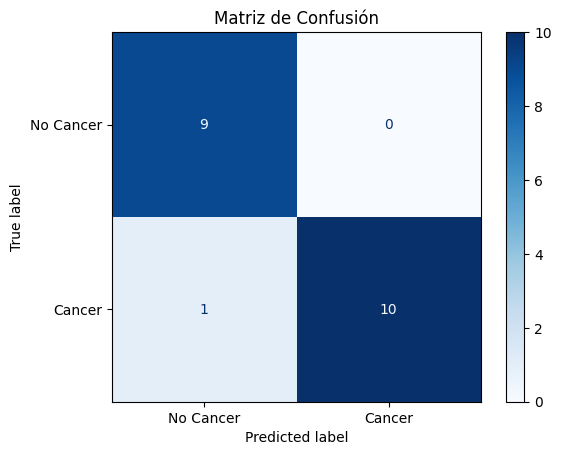

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Graficar la matriz de confusión
ConfusionMatrixDisplay(conf_matrix, display_labels=["No Cancer", "Cancer"]).plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

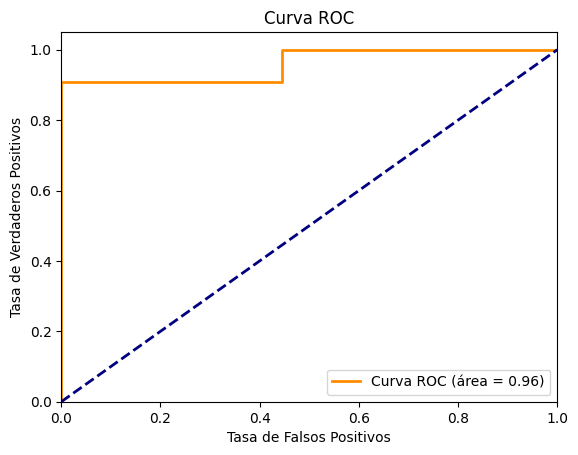

In [17]:
# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


C:\Users\Colibecas\AppData\Local\Temp\ipykernel_12304\2308637044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_nuevo.index, y="Probabilidad", data=df_nuevo, palette="viridis")


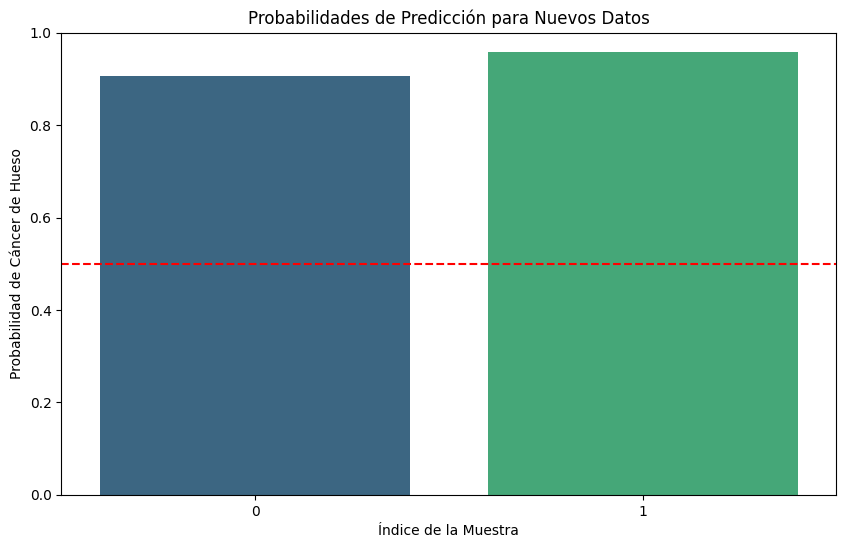

In [18]:
# Datos de nuevas predicciones y probabilidades
df_nuevo["Probabilidad"] = probabilidades

# Graficar las probabilidades de predicción para los datos nuevos
plt.figure(figsize=(10, 6))
sns.barplot(x=df_nuevo.index, y="Probabilidad", data=df_nuevo, palette="viridis")
plt.ylim(0, 1)
plt.axhline(0.5, ls='--', color='red')
plt.title("Probabilidades de Predicción para Nuevos Datos")
plt.xlabel("Índice de la Muestra")
plt.ylabel("Probabilidad de Cáncer de Hueso")
plt.show()
